In [59]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing import sequence
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and head
display(df.shape)
df.head()

(6335, 4)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [32]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [33]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [34]:
df["label"]=df.label.map(lambda a: 1 if a == 'FAKE' else 0)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [35]:
df["label"].value_counts()

0    3171
1    3164
Name: label, dtype: int64

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(6335, 4)

In [38]:
y=df.label
y.head()

0    1
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [39]:
y.isnull().sum()

0

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)

(5068,)
(1267,)


In [41]:
# the first news which is fake
sample_txt = x_train[0:1]
for word in sample_txt:
    print(word)

October 31, 2016 - Fort Russ -  Aleksandr Khrolenko, R IA Analytics -  translated by J. Arnoldski -  


Hardly a day goes by without foreign media circulating the false accusations that the leadership of the Syrian Arab Republic is guilty of the deaths of hundreds of thousands and even millions of Syrians. Even authoritative international organizations are cited as the sources of the dissemination of such information. 
In July 2013, according to UN Secretary General Ban Ki Moon, the death toll in Syria exceeded 100 thousand.  
In October 2014, the Jordanian prince and UN high commissioner for human rights, Zeid Raad al-Hussein, determined the number of people killed in Syria to be 200,000.  
By October 2015, according to UN figures, the number of killed in Syria was more than 240,000. 
In September 2016, the UN officially presented the figure of 300,000 Syrians killed and more than half of the Syrian population as refugees. 
According to the Dubai news channel “Al-Arabiya,” in October 

In [42]:
# the third news which is real(0)
sample_txt = x_train[2:3]
for word in sample_txt:
    print(word)

While investigators try to piece together what led the Orlando gunman to carry out an unspeakable act of terror, the attack is upending the 2016 campaign debate as the two presumptive rivals go toe-to-toe on terror with two very different messages.

In back-to-back speeches Monday, Donald Trump doubled down on his call for a Muslim immigration ban while decrying what he described as a "deadly ignorance" that is hurting the country -- and Hillary Clinton renewed her call for an assault-weapons ban while vowing to stop "lone wolf" terrorists.

Trump, speaking in New Hampshire, focused largely on his plans for an immigration crackdown. Trump said he wants to "suspend immigration from areas of the world where there is a proven history of terrorism" against the U.S. or its allies.

“We have no choice,” Trump said of the proposed ban. It wasn't immediately clear whether Trump was revising his long-standing proposal to temporarily bar foreign Muslims entering the U.S., which he also defended,

In [43]:
def report_heatmap(y_pred):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

# Bag of Words(Count Vectorization)

In [44]:
cv=CountVectorizer()
CV_Xtrain=cv.fit_transform(x_train)
CV_Xtest=cv.transform(x_test)

In [45]:
# check the first news' encoding of the count-vectorization
sample_0 = CV_Xtrain[0, :].toarray()
print("Total words used:", sample_0[0].size)
print(list(sample_0[0]))

Total words used: 61502
[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
# check how many non-zeros: this is the number of words used in the first news
non_zero = [ x for x in sample_0[0] if(x > 0)]
print("Total count of non-zero:", len(non_zero) )

Total count of non-zero: 385


In [47]:
# check the third news' encoding of the count-vectorization
sample_0 = CV_Xtrain[2, :].toarray()
print("Total words used:", sample_0[0].size)
print(list(sample_0[0]))

Total words used: 61502
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [48]:
# check how many non-zeros: this is the number of words used in the first news
non_zero = [ x for x in sample_0[0] if(x > 0)]
print("Total count of non-zero:", len(non_zero) )

Total count of non-zero: 397


# Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

Multinomial Naive Bayes(Countvectorization)

In [41]:
mnb=MultinomialNB()
mnb.fit(CV_Xtrain,y_train)

MultinomialNB()

Overall Accuracy: 88.40%
--------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       616
           1       0.93      0.84      0.88       651

    accuracy                           0.88      1267
   macro avg       0.89      0.89      0.88      1267
weighted avg       0.89      0.88      0.88      1267



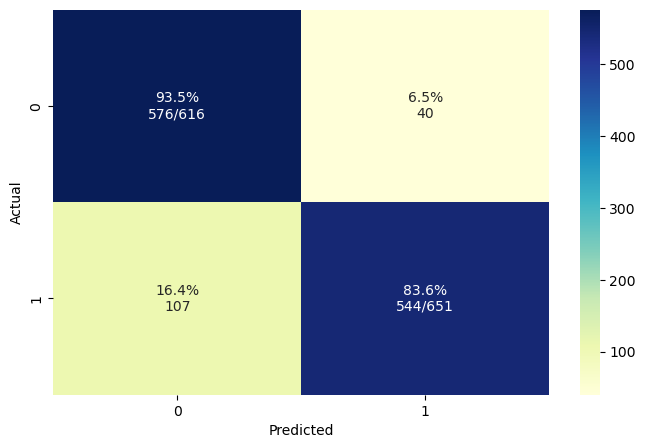

In [42]:
# Predict on the test set and calculate accuracy
y_pred=mnb.predict(CV_Xtest)

# display report
report_heatmap1(y_pred)

In [43]:
CV_Xtrain.toarray()

array([[ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

Gaussian Naive Bayes(Countvectorization)

Overall Accuracy: 81.22%
--------------------------
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       616
           1       0.88      0.74      0.80       651

    accuracy                           0.81      1267
   macro avg       0.82      0.81      0.81      1267
weighted avg       0.82      0.81      0.81      1267



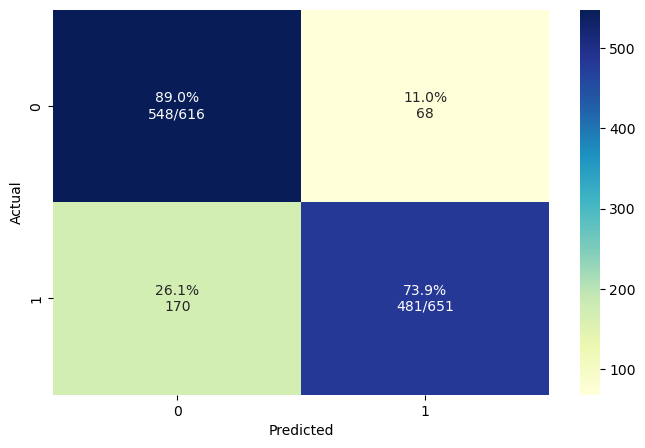

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(CV_Xtrain.toarray(),y_train)
# Predict on the test set and calculate accuracy
y_pred=gnb.predict(CV_Xtest.toarray())

# display report
report_heatmap(y_pred)

# TF-IDF Vectorization

In [49]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) 

tfidf_X_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_X_test=tfidf_vectorizer.transform(x_test)

print(tfidf_X_train.shape)  
type(tfidf_X_test)         

(5068, 61194)


scipy.sparse._csr.csr_matrix

In [50]:
# check the first news' encoding of the TF-IDF Vectorization
sample_0 = tfidf_X_train[0, :].toarray()
print("Total words used:", sample_0[0].size)
print(list(sample_0[0]))

Total words used: 61194
[0.0, 0.22638554013278347, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022332474570498487, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04605069230565457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.018604879478801854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [51]:
# check how many non-zeros: this is the number of words used in the first news
non_zero = [ x for x in sample_0[0] if(x > 0)]
print("Total count of non-zero:", len(non_zero) )

Total count of non-zero: 306


In [52]:
# check the third news' encoding of the TF-IDF Vectorization
sample_0 = tfidf_X_train[2, :].toarray()
print("Total words used:", sample_0[0].size)
print(list(sample_0[0]))

Total words used: 61194
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [53]:
non_zero = [ x for x in sample_0[0] if(x > 0)]
print("Total count of non-zero:", len(non_zero) )

Total count of non-zero: 311


Multinomial Naive Bayes(TF-IDF Vectorization)

In [46]:
mnb.fit(tfidf_X_train,y_train)

MultinomialNB()

In [47]:
mnb.score(tfidf_X_test,y_test)

0.819258089976322

Overall Accuracy: 81.93%
--------------------------
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       616
           1       0.98      0.66      0.79       651

    accuracy                           0.82      1267
   macro avg       0.86      0.82      0.82      1267
weighted avg       0.86      0.82      0.81      1267



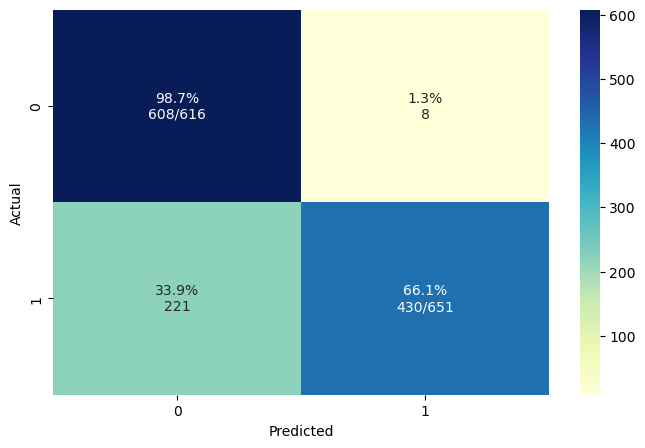

In [48]:
# Predict on the test set and calculate accuracy
y_pred=mnb.predict(tfidf_X_test)

# display report
report_heatmap(y_pred)

Gaussian Naive Bayes(TF-IDF Vectorization)

Overall Accuracy: 80.19%
--------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       616
           1       0.84      0.75      0.80       651

    accuracy                           0.80      1267
   macro avg       0.81      0.80      0.80      1267
weighted avg       0.81      0.80      0.80      1267



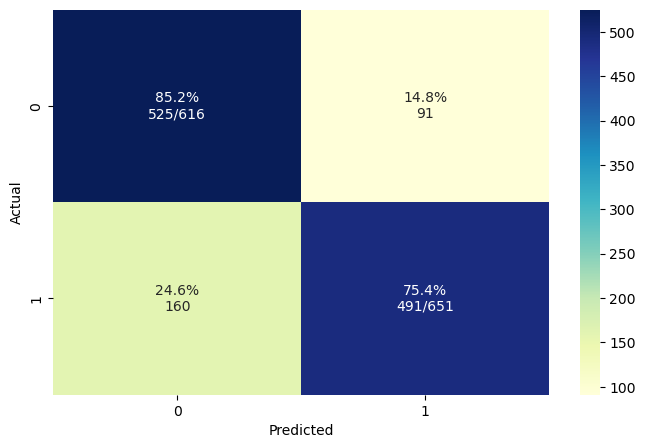

In [49]:
#from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(tfidf_X_train.toarray(),y_train)
# Predict on the test set and calculate accuracy
y_pred=gnb.predict(tfidf_X_test.toarray())

# display report
report_heatmap(y_pred)

# Random Forest Classification

Counvectorization

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcf = RandomForestClassifier(random_state=42)
rfcf.fit(CV_Xtrain,y_train)
rfcf.score(CV_Xtest,y_test)

0.8926598263614838

Overall Accuracy: 89.27%
--------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       616
           1       0.91      0.87      0.89       651

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



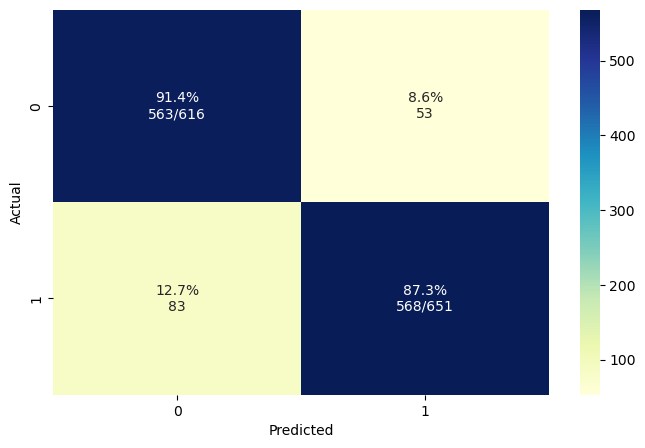

In [51]:
rfc_y_pred1 = rfcf.predict(CV_Xtest)

report_heatmap(rfc_y_pred1)

RFC(TF-IDF Vectorization)

Overall Accuracy: 91.87%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       616
           1       0.94      0.90      0.92       651

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



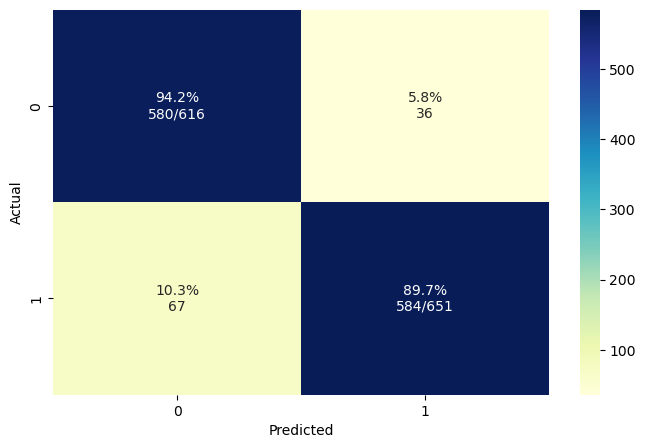

In [52]:
rfcf.fit(tfidf_X_train,y_train)

rfc_y_pred1 = rfcf.predict(tfidf_X_test)

report_heatmap(rfc_y_pred1)

RFC(Entropy) using Counvectorization

In [53]:
rfcf_ertopy = RandomForestClassifier(n_estimators=130,random_state=100,criterion='entropy')
rfcf_ertopy.fit(CV_Xtrain,y_train)
rfcf_ertopy.score(CV_Xtest,y_test)

0.8958168902920284

Overall Accuracy: 89.58%
--------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       616
           1       0.91      0.89      0.90       651

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



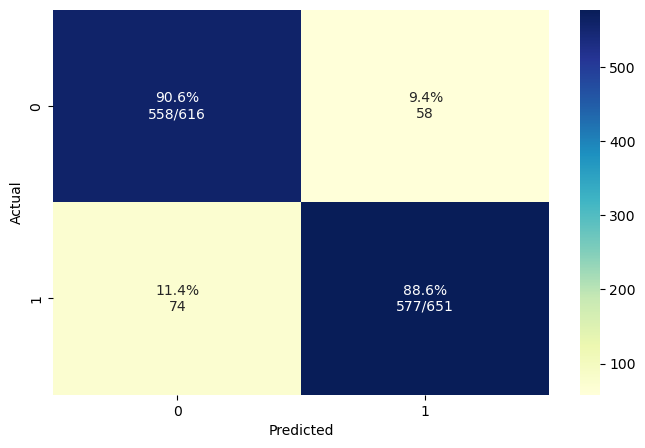

In [54]:
rfc_y_pred2 = rfcf_ertopy.predict(CV_Xtest)

report_heatmap(rfc_y_pred2)

RFC(Entropy) using TF-IDF Vectorization

Overall Accuracy: 91.79%
--------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       616
           1       0.93      0.91      0.92       651

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



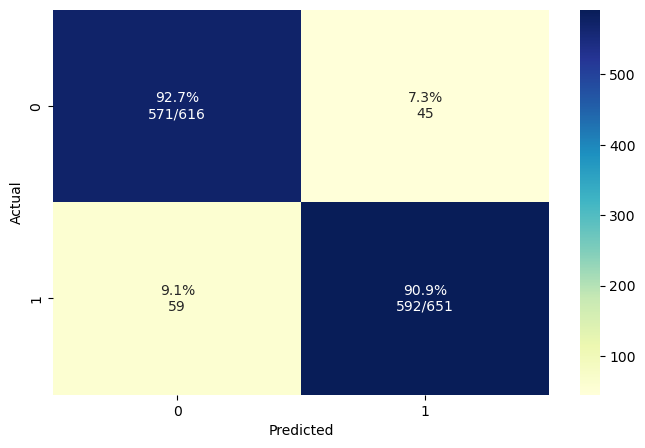

In [55]:
rfcf_ertopy.fit(tfidf_X_train,y_train)

rfc_y_pred1 = rfcf_ertopy.predict(tfidf_X_test)

report_heatmap(rfc_y_pred1)

In [65]:
#Parameter Tuning of RFC
from sklearn.model_selection import GridSearchCV
params ={
    
    'n_estimators': [x for x in range(1, 100) ],  
    'max_depth':    [x for x in range(1, 4)],  
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf':  [1, 2, 4], 
     'criterion':['entropy']
}
rfc = GridSearchCV(estimator=rfcf, 
                          param_grid=params, 
                          cv=3, verbose=2, n_jobs=-1)
rfc.fit(CV_Xtrain,y_train)

print("\nRFC best parameters: ")
display(rfc.best_params_)

print("RFC best score: " + str(rfc.best_score_))

Fitting 3 folds for each of 2673 candidates, totalling 8019 fits

RFC best parameters: 


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 93}

RFC best score: 0.7586796103806625


Overall Accuracy: 78.37%
--------------------------
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       616
           1       0.79      0.80      0.79       651

    accuracy                           0.78      1267
   macro avg       0.78      0.78      0.78      1267
weighted avg       0.78      0.78      0.78      1267



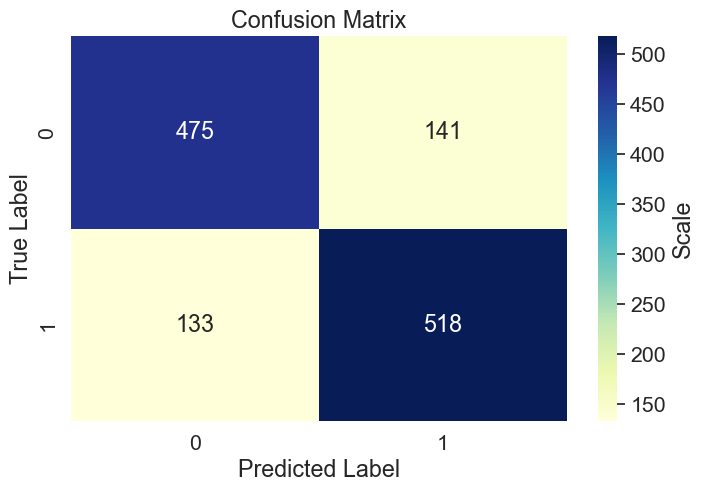

In [62]:
# best rfc:
rfc_best = RandomForestClassifier( n_estimators = 50,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_depth = 3, 
 random_state = 42)

# train
rfc_best.fit(CV_Xtrain,y_train)

# accuracy for testing    
rfc_y_pred = rfc_best.predict(CV_Xtest)

report_heatmap(rfc_y_pred)

# Support Vector Machine

Support Vector Machine('rbf') using CountVectorization

Overall Accuracy: 54.14%
--------------------------
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       616
           1       0.53      1.00      0.69       651

    accuracy                           0.54      1267
   macro avg       0.76      0.53      0.40      1267
weighted avg       0.76      0.54      0.41      1267



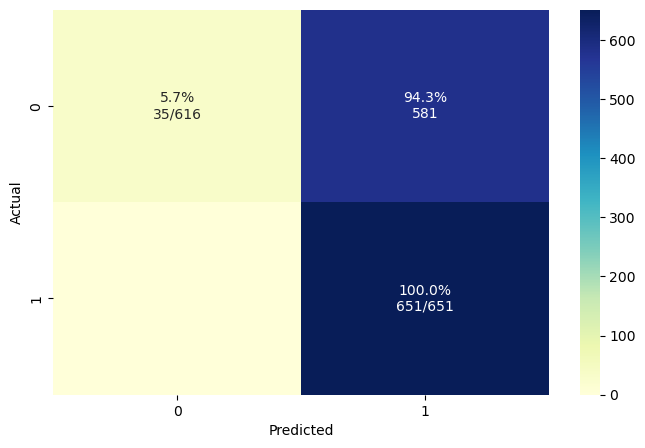

In [56]:
from sklearn.svm import SVC
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=10).fit(CV_Xtrain, y_train)
Y_pred_rbf =rbf_svc.predict(CV_Xtest)

report_heatmap(Y_pred_rbf)


Support Vector Machine('rbf') using TF-IDF

Overall Accuracy: 94.40%
--------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       616
           1       0.94      0.95      0.95       651

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



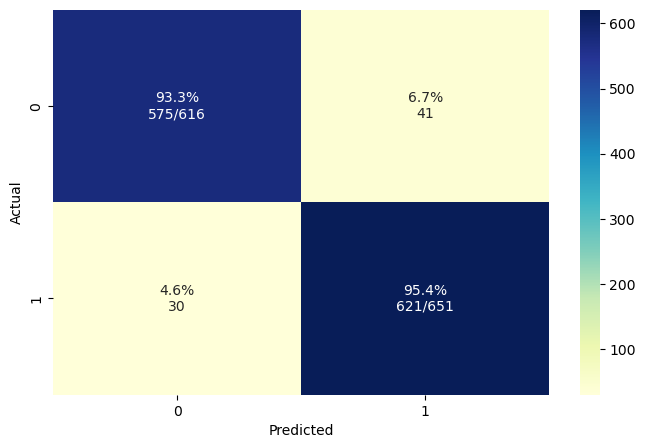

In [57]:
#from sklearn.svm import SVC
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=10).fit(tfidf_X_train, y_train)
Y_pred_rbf =rbf_svc.predict(tfidf_X_test)

report_heatmap(Y_pred_rbf)


# Multi-Lyer Perceptron Classification

MLP with CountVectorization

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    activation="relu",
    hidden_layer_sizes={200,300},
    solver="adam",
    learning_rate_init=0.01,
    random_state=300
)

mlp.fit(CV_Xtrain, y_train)
mlp.score(CV_Xtest,y_test)

0.941594317284925

Overall Accuracy: 94.16%
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       616
           1       0.96      0.92      0.94       651

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



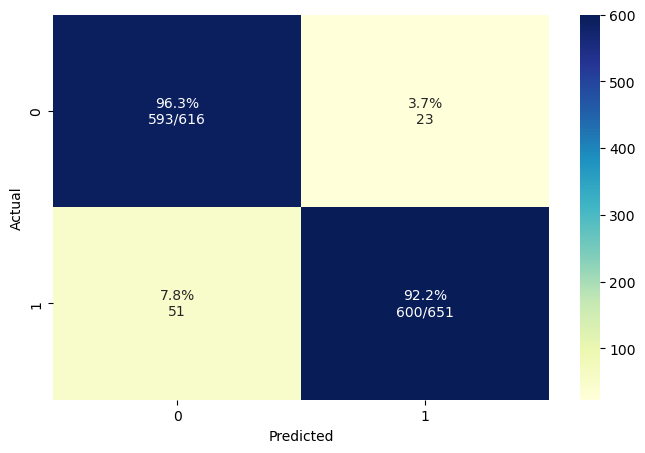

In [59]:
Y_pred_mlp =mlp.predict(CV_Xtest)

report_heatmap(Y_pred_mlp)

MLP with TF-IDF 

In [60]:
mlp.fit(tfidf_X_train, y_train)
mlp.score(tfidf_X_test,y_test)

0.9423835832675612

Overall Accuracy: 94.24%
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       616
           1       0.95      0.94      0.94       651

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



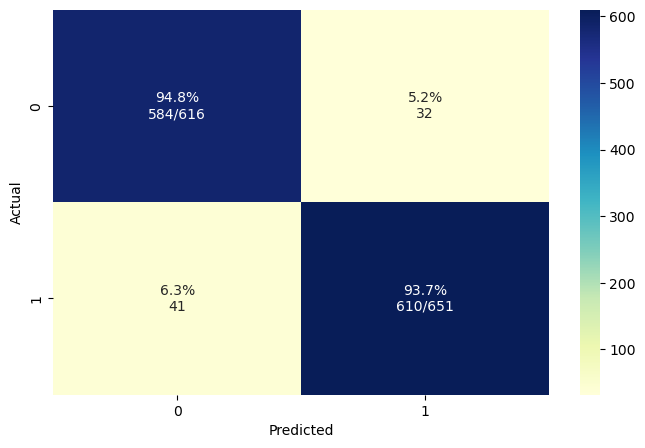

In [61]:
Y_pred_mlp1 =mlp.predict(tfidf_X_test)

report_heatmap(Y_pred_mlp1)

# Deep Neural Network

DNN with TF-IDF

40/40 [==============================] - 1s 15ms/step
Overall Accuracy: 94.95%
--------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       616
           1       0.95      0.95      0.95       651

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



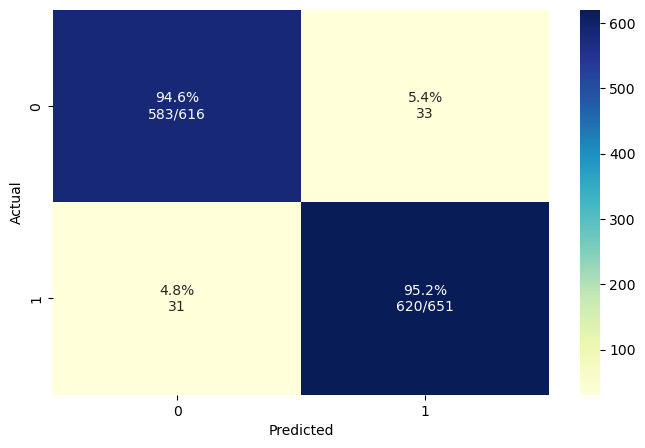

In [62]:
#Changing from csr matrix to array 
tfidf_matrix_train=tfidf_X_train.toarray()
tfidf_matrix_valid=tfidf_X_test.toarray()
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(tfidf_matrix_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max',
                   patience=10,
                   restore_best_weights=True)

NN_Classifier = model.fit(tfidf_matrix_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=0,
                    validation_data=(tfidf_matrix_valid, y_test))

y_pred_NN=(model.predict(tfidf_matrix_valid) > 0.5).astype(int)
report_heatmap(y_pred_NN)
